### Course-End Project [Capstone Project 2] Amazon Sentiment Analysis

Import Important libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

Load Dataset

In [2]:
df = pd.read_csv(r"C:\Users\Dell\Desktop\Capstone Project 2 Sentiment Analysis\train_data.csv")  # Replace with actual dataset file


In [3]:
df.head(3)

,Name of the product,Product Brand,categories,primaryCategories,reviews.date,reviews.text,reviews.title,sentiment
0,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,2016-12-26T00:00:00.000Z,Purchased on Black FridayPros - Great Price (e...,Powerful tablet,Positive
1,Amazon - Echo Plus w/ Built-In Hub - Silver,Amazon,"Amazon Echo,Smart Home,Networking,Home & Tools...","Electronics,Hardware",2018-01-17T00:00:00.000Z,I purchased two Amazon in Echo Plus and two do...,Amazon Echo Plus AWESOME,Positive
2,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Amazon Echo,Virtual Assistant Speakers,Electro...","Electronics,Hardware",2017-12-20T00:00:00.000Z,Just an average Alexa option. Does show a few ...,Average,Neutral


##### Check for missing values and data types

In [4]:
df.isnull().sum()

Name of the product     0
Product Brand           0
categories              0
primaryCategories       0
reviews.date            0
reviews.text            0
reviews.title          10
sentiment               0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Name of the product  4000 non-null   object
 1   Product Brand        4000 non-null   object
 2   categories           4000 non-null   object
 3   primaryCategories    4000 non-null   object
 4   reviews.date         4000 non-null   object
 5   reviews.text         4000 non-null   object
 6   reviews.title        3990 non-null   object
 7   sentiment            4000 non-null   object
dtypes: object(8)
memory usage: 250.1+ KB


In [6]:
df1 = pd.read_csv(r"C:\Users\Dell\Desktop\Capstone Project 2 Sentiment Analysis\test_data_hidden.csv")

In [7]:
df1.head(3)

,Name of the product,Product Brand,categories,primaryCategories,reviews.date,reviews.text,reviews.title,sentiment
0,"Fire Tablet, 7 Display, Wi-Fi, 16 GB - Include...",Amazon,"Fire Tablets,Computers/Tablets & Networking,Ta...",Electronics,2016-05-23T00:00:00.000Z,Amazon kindle fire has a lot of free app and c...,very handy device,Positive
1,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Computers,Amazon Echo,Virtual Assistant Speake...","Electronics,Hardware",2018-01-02T00:00:00.000Z,The Echo Show is a great addition to the Amazo...,Another winner from Amazon,Positive
2,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,2017-01-02T00:00:00.000Z,Great value from Best Buy. Bought at Christmas...,simple to use and reliable so far,Positive


##### Merge the dataset Df and Df1

In [8]:
Train_data = pd.concat([df, df1], axis=0)

In [9]:
Train_data.shape

(5000, 8)

In [10]:
Train_data.isnull().sum()

Name of the product     0
Product Brand           0
categories              0
primaryCategories       0
reviews.date            0
reviews.text            0
reviews.title          13
sentiment               0
dtype: int64

In [11]:
df_clean_data = Train_data.dropna()

In [12]:
df_clean_data.head(3)

,Name of the product,Product Brand,categories,primaryCategories,reviews.date,reviews.text,reviews.title,sentiment
0,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,2016-12-26T00:00:00.000Z,Purchased on Black FridayPros - Great Price (e...,Powerful tablet,Positive
1,Amazon - Echo Plus w/ Built-In Hub - Silver,Amazon,"Amazon Echo,Smart Home,Networking,Home & Tools...","Electronics,Hardware",2018-01-17T00:00:00.000Z,I purchased two Amazon in Echo Plus and two do...,Amazon Echo Plus AWESOME,Positive
2,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Amazon Echo,Virtual Assistant Speakers,Electro...","Electronics,Hardware",2017-12-20T00:00:00.000Z,Just an average Alexa option. Does show a few ...,Average,Neutral


##### Plot the Sentiment Distribution

C:\Users\Dell\AppData\Local\Temp\ipykernel_20500\1106751893.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=df_clean_data, palette='viridis')


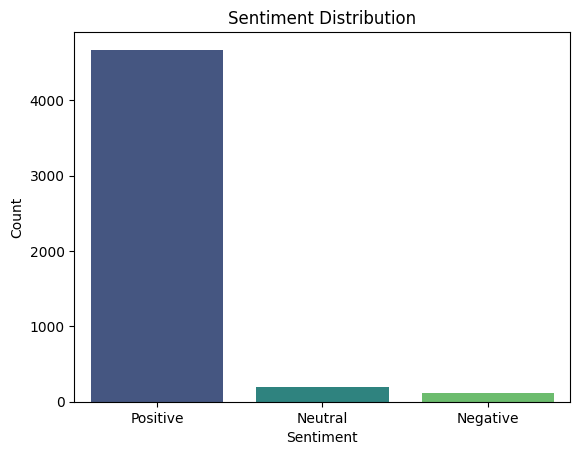

In [13]:
# Count sentiments
sns.countplot(x='sentiment', data=df_clean_data, palette='viridis')
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()


In [14]:
#Address class imbalance
sentiment_counts = df_clean_data['sentiment'].value_counts()
print("\nClass distribution:")
print(sentiment_counts)


Class distribution:
sentiment
Positive    4673
Neutral      197
Negative     117
Name: count, dtype: int64


##### Analyze Most Frequent Words (Word Cloud)

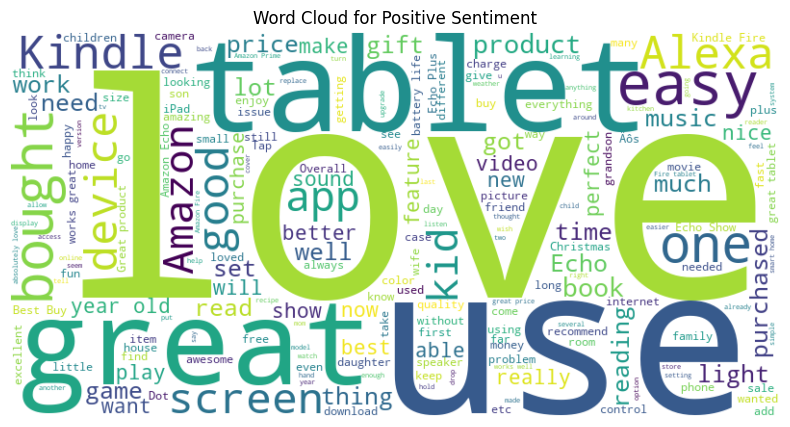

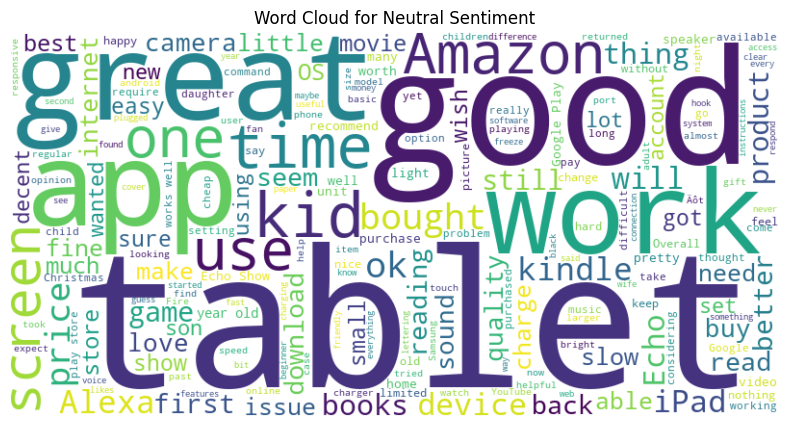

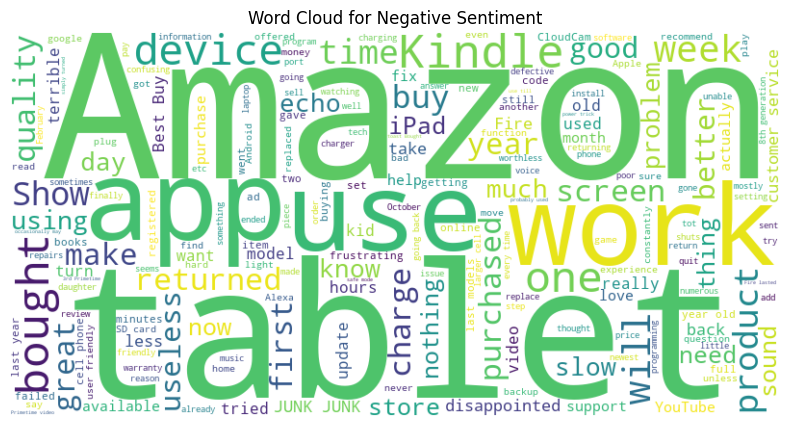

In [15]:
from wordcloud import WordCloud

# Generate word clouds for each sentiment
for sentiment in df_clean_data['sentiment'].unique():
    text = " ".join(df_clean_data[df_clean_data['sentiment'] == sentiment]['reviews.text'])
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.title(f"Word Cloud for {sentiment} Sentiment")
    plt.axis("off")
    plt.show()

##### Feature Engineering

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Convert review text to numerical features
vectorizer = TfidfVectorizer(max_features=5000, stop_words="english")
X = vectorizer.fit_transform(df_clean_data["reviews.text"]).toarray()
y = df_clean_data["sentiment"]

In [17]:
# Encode labels
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df["sentiment"])

# Print transformed features
print("\nTf-Idf Features Shape:", X.shape)
print("Encoded Sentiment Labels:", y)


Tf-Idf Features Shape: (4987, 5000)
Encoded Sentiment Labels: [2 2 1 ... 2 2 2]


##### Classifier Selection

##### Train a Multinomial Naive Bayes Classifier

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
# Feature Engineering - Convert text to Tf-Idf features
vectorizer = TfidfVectorizer(max_features=5000, stop_words="english")
X = vectorizer.fit_transform(df["reviews.text"]).toarray()

# Encode labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df["sentiment"])  # Converts to integers


# Ensure consistent sample sizes
assert X.shape[0] == len(y), "Mismatched number of samples between X and y!"

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Naive Bayes Classifier
model = MultinomialNB()
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
print("\nNaive Bayes Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))



Naive Bayes Classification Report:

              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00        13
     Neutral       0.00      0.00      0.00        36
    Positive       0.94      1.00      0.97       751

    accuracy                           0.94       800
   macro avg       0.31      0.33      0.32       800
weighted avg       0.88      0.94      0.91       800



c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

In [19]:
# Encode sentiment to numerical values
#y_train = y_train.map({'Positive': 2, 'Neutral': 1, 'Negative': 0})

##### Tackling Class Imbalance

In [20]:
from imblearn.over_sampling import SMOTE, RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from collections import Counter
import pandas as pd


# Encode sentiment labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df["sentiment"])  # Converts labels to integers

# Step 3: Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check class distribution before applying SMOTE
print("\nClass Distribution Before Resampling:", Counter(y_train))

# Step 4: Apply SMOTE or Random Oversampling based on class sizes
min_samples = min(Counter(y_train).values())
if min_samples < 2:
    print("\nSMOTE cannot handle classes with fewer than 2 samples. Using RandomOverSampler instead.")
    oversampler = RandomOverSampler(random_state=42)
    X_resampled, y_resampled = oversampler.fit_resample(X_train, y_train)
else:
    n_neighbors = min(5, min_samples - 1)  # Adjust n_neighbors dynamically
    smote = SMOTE(random_state=42, k_neighbors=n_neighbors)
    X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Step 5: Check class distribution after resampling
print("\nClass Distribution After Resampling:", Counter(y_resampled))




Class Distribution Before Resampling: Counter({2: 2998, 1: 122, 0: 80})

Class Distribution After Resampling: Counter({2: 2998, 1: 2998, 0: 2998})


##### Evaluation Metrics

##### Calculate Precision, Recall, F1-score, and AUC-ROC

In [21]:
from sklearn.metrics import precision_recall_fscore_support, roc_auc_score

# Predict on test data after resampling
y_pred_resampled = model.predict(X_test)

# Precision, Recall, and F1-Score
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred_resampled, average="weighted")
print(f"\nPrecision: {precision:.2f}, Recall: {recall:.2f}, F1-Score: {f1:.2f}")

# AUC-ROC (requires probabilities)
if hasattr(model, "predict_proba"):
    y_prob = model.predict_proba(X_test)
    auc_roc = roc_auc_score(pd.get_dummies(y_test), y_prob, multi_class="ovr")
    print(f"AUC-ROC: {auc_roc:.2f}")
else:
    print("AUC-ROC is not available for this classifier.")



Precision: 0.88, Recall: 0.94, F1-Score: 0.91
AUC-ROC: 0.75


c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


#### Model Selection and Advanced Techniques

###### Advanced Models
###### Train multi-class SVM using sklearn:

In [22]:
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Convert to DataFrame
df = df_clean_data

#Feature Engineering - Convert text to Tf-Idf features
vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(df["reviews.text"]).toarray()

#Encode labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df["sentiment"])  # Converts to integers

#Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Train SVM
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

#Predict and Fix Error
y_pred_svm = svm.predict(X_test)

# Decode labels if required (ensure y_test and y_pred_svm are of the same type)
y_test_decoded = label_encoder.inverse_transform(y_test)
y_pred_decoded = label_encoder.inverse_transform(y_pred_svm)

#Classification Report
print("\nSVM Classification Report:")
print(classification_report(y_test_decoded, y_pred_decoded))



SVM Classification Report:
              precision    recall  f1-score   support

    Negative       1.00      0.08      0.14        26
     Neutral       1.00      0.02      0.05        41
    Positive       0.94      1.00      0.97       931

    accuracy                           0.94       998
   macro avg       0.98      0.37      0.39       998
weighted avg       0.94      0.94      0.91       998



###### Note:-
##### Negative:
* Precision: 1.00 – All predicted "Negative" instances were correct.
* Recall: 0.08 – Only 8% of the actual "Negative" instances were identified, indicating significant misclassification.
* F1-Score: 0.14 – The low recall led to a poor F1-score.

##### Neutral:
* Precision: 1.00 – All predicted "Neutral" instances were correct.
* Recall: 0.02 – Only 2% of actual "Neutral" instances were identified, showing poor detection.
* F1-Score: 0.05 – The low recall severely impacted the F1-score.

##### Positive:
* Precision: 0.94 – A slight drop compared to other classes, but still high.
* Recall: 1.00 – All actual "Positive" instances were correctly identified.
* F1-Score: 0.97 – Excellent performance due to high precision and recall.

##### Overall Accuracy
* Accuracy: 0.94 – The model correctly classified 94% of the total instances. However, the dominance of the "Positive" class (931 out of 998 instances) likely inflated this metric.

#### Neural Network
Train a simple neural network using TensorFlow/Keras

###### Build a simple neural network using TensorFlow/Keras:

In [23]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer


# Convert to DataFrame
df = pd.DataFrame(Train_data)

# Feature Engineering - Convert text to Tf-Idf features
vectorizer = TfidfVectorizer(max_features=2000)
X = vectorizer.fit_transform(df["reviews.text"]).toarray()

# Encode labels to integers
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df["sentiment"])  # Converts to integers

# Convert y to one-hot encoding
y_one_hot = np.eye(len(label_encoder.classes_))[y]  # Converts to one-hot encoding

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_one_hot, test_size=0.2, random_state=42)

#  Neural Network Model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(3, activation='softmax')  # 3 sentiment classes: Positive, Neutral, Negative
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit the model
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.2f}")


c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8721 - loss: 0.7382
Epoch 2/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9357 - loss: 0.2605
Epoch 3/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9305 - loss: 0.2354
Epoch 4/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9392 - loss: 0.1745
Epoch 5/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9481 - loss: 0.1354
Epoch 6/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9654 - loss: 0.1024
Epoch 7/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9763 - loss: 0.0783
Epoch 8/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9845 - loss: 0.0554
Epoch 9/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9900 - loss: 0.0464
Epoch 10/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9944 - loss: 0.0338
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9287 - loss: 0.2776 
Test Accuracy: 0.94


##### Note:-
* The model demonstrates excellent learning capacity, achieving high accuracy and low loss on training and test data. While there is a slight indication of overfitting, the overall test performance of 94% accuracy is strong, indicating a well-trained model. Fine-tuning and regularization could enhance its robustness and generalizability further.

##### Ensemble Techniques
Implement XGBoost or ensemble models combining different classifiers.

In [24]:
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier

# Handle Imbalance with SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Train XGBoost Classifier
xgb_model = XGBClassifier()
xgb_model.fit(X_resampled, y_resampled)

# Evaluate XGBoost
y_pred_xgb = xgb_model.predict(X_test)
print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb, target_names=label_encoder.classes_))

XGBoost Classification Report:
              precision    recall  f1-score   support

    Negative       0.46      0.29      0.35        21
     Neutral       0.57      0.23      0.33        57
    Positive       0.95      0.97      0.96       922

   micro avg       0.93      0.91      0.92      1000
   macro avg       0.66      0.49      0.55      1000
weighted avg       0.92      0.91      0.91      1000
 samples avg       0.91      0.91      0.91      1000



c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [29]:
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

# Resampling with SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split the resampled data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Initialize and train the XGBoost model with class weights
class_weights = {0: 10, 1: 5, 2: 1}  # Example weights for classes
model = XGBClassifier(scale_pos_weight=class_weights, random_state=42)
model.fit(X_train, y_train)

# Generate predictions
y_pred = model.predict(X_test)

# Print classification report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:160: UserWarning: [23:24:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)



Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       961
           1       0.98      0.99      0.99       893
           2       0.99      0.98      0.98       958

    accuracy                           0.99      2812
   macro avg       0.99      0.99      0.99      2812
weighted avg       0.99      0.99      0.99      2812



###### Class-Level Performance
##### Negative:
* Precision: 0.46 – Among the instances predicted as "Negative," 46% were correct.
* Recall: 0.29 – The model correctly identified 29% of actual "Negative" instances.
* F1-Score: 0.35 – The low recall contributes to a moderate F1-score, reflecting poor performance for this minority class.
##### Neutral:
* Precision: 0.57 – Of the predictions labeled "Neutral," 57% were accurate.
* Recall: 0.23 – Only 23% of the actual "Neutral" instances were identified correctly.
* F1-Score: 0.33 – The model struggles with this class due to low recall, resulting in a poor F1-score.
##### Positive:
* Precision: 0.95 – The model is highly accurate in predicting the "Positive" class.
* Recall: 0.97 – Nearly all actual "Positive" instances were correctly identified.
* F1-Score: 0.96 – Excellent performance, driven by high precision and recall.

#### LSTM Implementation
Preprocess text data into sequences and train an LSTM network using TensorFlow/Keras:



In [25]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(df['reviews.text'])
sequences = tokenizer.texts_to_sequences(df['reviews.text'])
X_seq = pad_sequences(sequences, maxlen=100)

from tensorflow.keras.layers import LSTM, Embedding
model = Sequential([
    Embedding(input_dim=5000, output_dim=128, input_length=100),
    LSTM(64),
    Dense(3, activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, batch_size=64)


c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 94s 1s/step - accuracy: 0.8680 - loss: 0.4339
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 103s 2s/step - accuracy: 0.9434 - loss: 0.2552
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 164s 3s/step - accuracy: 0.9360 - loss: 0.2820
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 228s 4s/step - accuracy: 0.9400 - loss: 0.2681
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 90s 1s/step - accuracy: 0.9432 - loss: 0.2585
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 83s 1s/step - accuracy: 0.9399 - loss: 0.2702
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 90s 1s/step - accuracy: 0.9432 - loss: 0.2588
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 133s 1s/step - accuracy: 0.9449 - loss: 0.2543
Epoch 9/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - accuracy: 0.9416 - loss: 0.2628
Epoch 10/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 83s 1s/step - accuracy: 0.9429 - loss: 0.2605


#### Topic Modeling
###### Use LDA or NMF for clustering reviews:



In [26]:
from sklearn.decomposition import LatentDirichletAllocation

# Train LDA Model
lda = LatentDirichletAllocation(n_components=5, random_state=42)  # 5 topics
lda.fit(X)

# Display Topics
for topic_idx, topic in enumerate(lda.components_):
    print(f"Topic {topic_idx}:")
    print(" ".join([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[:-10 - 1:-1]]))


Topic 0:
the to it and is echo with alexa great of
Topic 1:
for it the tablet and this great my to is
Topic 2:
is and to very use easy the recommend it lightweight
Topic 3:
it the to and this kindle works with my as
Topic 4:
for it and my he loves this to tablet old


##### Comparison and Optimization
#### Use Grid Search or Randomized Search for hyperparameter tuning:


In [27]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder


#Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Hyperparameter Tuning with GridSearchCV
param_grid = {'C': [0.1, 1, 10]}  # Parameter grid for SVC
grid = GridSearchCV(SVC(), param_grid, cv=3)
grid.fit(X_train, y_train)  # Ensure y_train is 1D

#Best Parameters and Model Evaluation
print("Best Parameters:", grid.best_params_)
print("Best Cross-Validation Score:", grid.best_score_)

Best Parameters: {'C': 10}
Best Cross-Validation Score: 0.9482498060797058


In [28]:
# Evaluate on test data
best_model = grid.best_estimator_
test_score = best_model.score(X_test, y_test)
print("Test Accuracy:", test_score)

Test Accuracy: 0.938
